In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from scipy.signal import savgol_filter

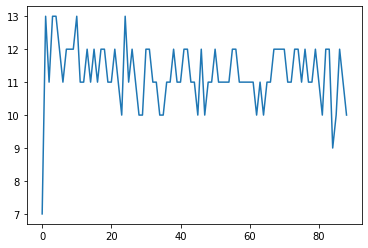

In [2]:
data = pd.read_csv("final", header=None)
data2 = pd.read_csv("final2", header=None)
data3 = pd.read_csv("final3", header=None)
data4 = pd.read_csv("final4", header=None)
data5 = pd.read_csv("final5", header=None)
data6 = pd.read_csv("final6", header=None)
data7 = pd.read_csv("final7", header=None)

plt.plot(data)

In [3]:
data_concat = pd.concat([data, data2, data3, data4, data5, data6, data7], ignore_index=True)

In [4]:
data_concat = data_concat.rename(columns={0: "arduino_reading"})
data_concat["time"] = np.linspace(0, 409*5, 410)
data_concat["conductivity"] = (data_concat["arduino_reading"] - b) / m
data_concat[data_concat < 0] = 0
data_concat

NameError: name 'b' is not defined

In [ ]:
plt.plot(data_concat["time"], data_concat["conductivity"])
plt.xlabel("Temps (s)")
plt.ylabel("Conductivité (mS/cm)")
plt.title("Graphique de la conductivité lors d'un effort physique en vélo stationnaire")
plt.show()

In [ ]:
data_filter = data_concat.loc[data_concat["arduino_reading"] > 110]

In [ ]:
m2, b2 = np.polyfit(data_filter["time"], data_filter["conductivity"], 1)

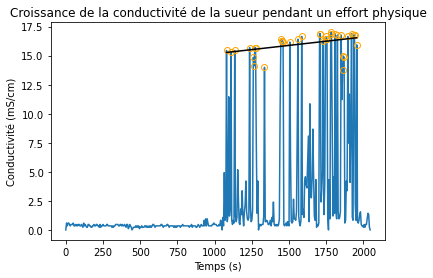

In [25]:
plt.plot(data_concat["time"], data_concat["conductivity"])
plt.plot(data_filter["time"], data_filter["conductivity"], 'o', fillstyle='none', color='orange')
plt.plot(data_filter["time"], m2*data_filter["time"]+b2, color='black')
plt.xlabel("Temps (s)")
plt.ylabel("Conductivité (mS/cm)")
plt.title("Croissance de la conductivité de la sueur pendant un effort physique")
plt.show()

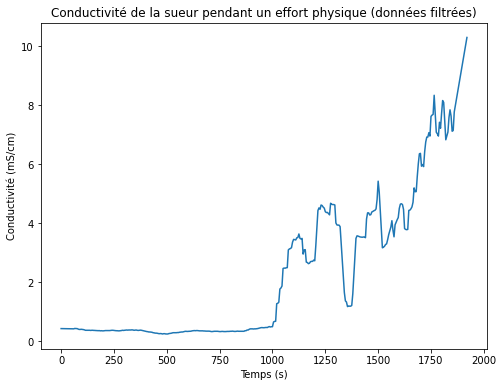

In [80]:
plt.figure(figsize=(8,6))
plt.plot(data_concat["time"][:-25], savgol_filter(data_concat["conductivity"][:-25], 25, 1))
plt.title("Conductivité de la sueur pendant un effort physique (données filtrées)")
plt.xlabel("Temps (s)")
plt.ylabel("Conductivité (mS/cm)")
#plt.savefig("graphs/sweat_test_smooth.svg")
plt.show()

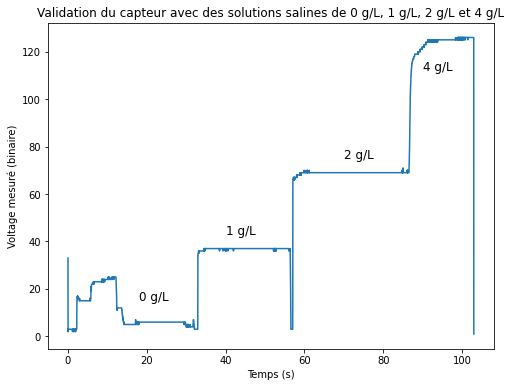

In [81]:
validation_labo = pd.read_csv("validation_test_labo_COPY.log", header=None)
plt.figure(figsize=(8,6))
plt.plot(np.linspace(0, 103, 6611), validation_labo)
plt.xlabel("Temps (s)")
plt.ylabel("Voltage mesuré (binaire)")
plt.title("Validation du capteur avec des solutions salines de 0 g/L, 1 g/L, 2 g/L et 4 g/L")
plt.text(18, 15, "0 g/L", fontsize=12)
plt.text(40, 43, "1 g/L", fontsize=12)
plt.text(70, 75, "2 g/L", fontsize=12)
plt.text(90, 112, "4 g/L", fontsize=12)
#plt.savefig("graphs/validation_test.svg")
plt.show()

In [6]:
gL4 = pd.read_csv("4gL-1_Copy.txt")

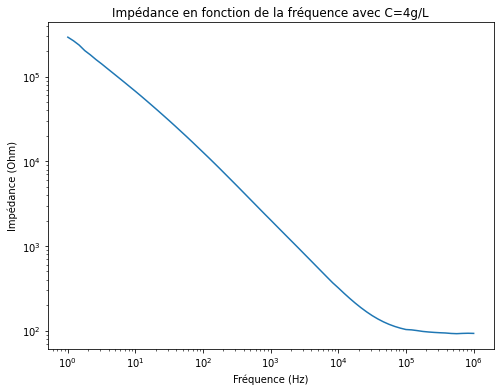

In [7]:
plt.figure(figsize=(8,6))
plt.plot(gL4["Freq/Hz"], gL4["Z/ohm"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Impédance (Ohm)")
plt.title("Impédance en fonction de la fréquence avec C=4g/L")
plt.savefig("graphs/imp_freq_4.svg")
plt.show()

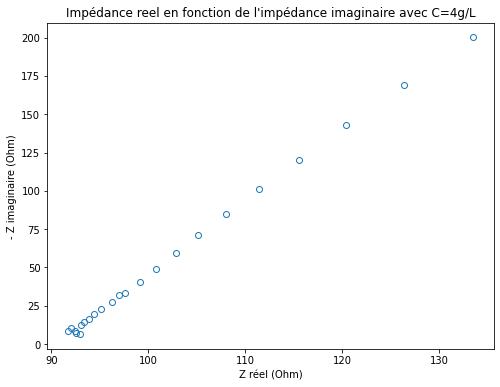

In [83]:
gL4_ohm = gL4[gL4["Z'/ohm"] < 140]
plt.figure(figsize=(8,6))
plt.plot(gL4_ohm["Z'/ohm"], -gL4_ohm['Z"/ohm'], linestyle="", marker="o", fillstyle="none")
plt.xlabel("Z réel (Ohm)")
plt.ylabel("- Z imaginaire (Ohm)")
plt.title("Impédance reel en fonction de l'impédance imaginaire avec C=4g/L")
#plt.savefig("graphs/reel_img_4.svg")
plt.show()

In [8]:
gL04 = pd.read_csv("0.4gL-1_Copy.txt")

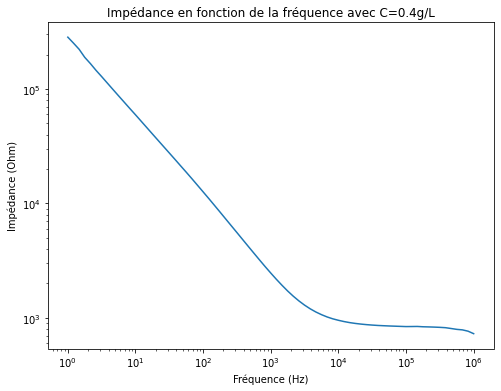

In [12]:
plt.figure(figsize=(8,6))
plt.plot(gL04["Freq/Hz"], gL04["Z/ohm"])
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Fréquence (Hz)")
plt.ylabel("Impédance (Ohm)")
plt.title("Impédance en fonction de la fréquence avec C=0.4g/L")
plt.savefig("graphs/imp_freq_04.svg")
plt.show()

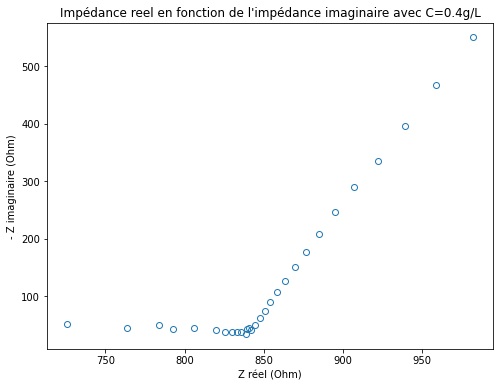

In [11]:
gL04_ohm = gL04[gL04["Z'/ohm"] < 1000]
plt.figure(figsize=(8,6))
plt.plot(gL04_ohm["Z'/ohm"], -gL04_ohm['Z"/ohm'], linestyle="", marker="o", fillstyle="none")
plt.xlabel("Z réel (Ohm)")
plt.ylabel("- Z imaginaire (Ohm)")
plt.title("Impédance reel en fonction de l'impédance imaginaire avec C=0.4g/L")
plt.savefig("graphs/reel_img_04.svg")
plt.show()

In [17]:
calibration_data = pd.read_csv("calibration_results.txt")
calibration_data

,arduino_reading,conductivity
0,128,14.805111
1,83,8.488264
2,43,4.188288
3,6,0.000050


In [18]:
m, b = np.polyfit(calibration_data["conductivity"], calibration_data["arduino_reading"], 1)
r2_error = r2_score(m*calibration_data["conductivity"]+b, calibration_data["arduino_reading"])
r2_error

0.9959885081810443

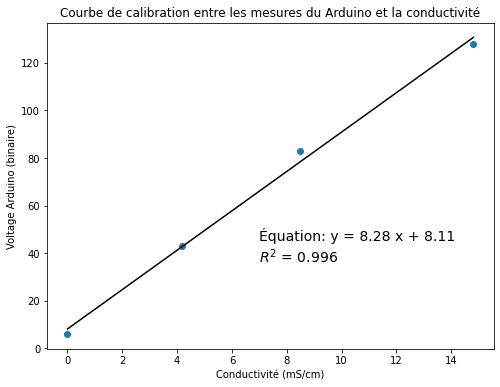

In [86]:
plt.figure(figsize=(8,6))
plt.plot(calibration_data["conductivity"], calibration_data["arduino_reading"], 'o')
plt.plot(calibration_data["conductivity"], m*calibration_data["conductivity"] + b, color="black")
plt.plot()
plt.xlabel("Conductivité (mS/cm)")
plt.ylabel("Voltage Arduino (binaire)")
plt.title("Courbe de calibration entre les mesures du Arduino et la conductivité")
plt.text(7, 36, f"Équation: y = {round(m, 2)} x + {round(b, 2)}\n$R^2$ = {round(r2_error, 3)}", fontsize=14)
#plt.savefig("graphs/calibration_curve.svg")
plt.show()